In [493]:
import importlib
import sys
import os
import glob
import time
import h5py
import traceback

import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil
import auxiliary as aux
import plotting as putil

In [494]:
util.set_sns_style(style='dark', min_fontsize=8)
%matplotlib notebook
rootdir = util.get_rootdir()
rootdir

'/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data'

In [504]:
rootdir = '/Volumes/Julie/2p-data'
date = 20230822
session = str(date)
sessdir = os.path.join(rootdir, session)
print(sessdir)
# behavior data
behavior_dir = os.path.join(sessdir, 'behavior')
logdir = os.path.join(sessdir, 'behavior') #'logfiles')
videodir = os.path.join(sessdir, 'behavior') #'videos')
# 2p data
neural_dir = os.path.join(sessdir, 'raw')

/Volumes/Julie/2p-data/20230822


In [506]:
# fly ID
flynum = 3
flyid = 'fly{}'.format(flynum)

logfiles = aux.get_logs_for_fly_date(date, flynum, logdir)
logfiles

['/Volumes/Julie/2p-data/20230822/behavior/20230822-153812_P1_activation_fly3_000.log',
 '/Volumes/Julie/2p-data/20230822/behavior/20230822-160657_P1_activation_fly3_001.log',
 '/Volumes/Julie/2p-data/20230822/behavior/20230822-162257_P1_activation_fly3_002.log',
 '/Volumes/Julie/2p-data/20230822/behavior/20230822-162500_P1_activation_fly3_003.log',
 '/Volumes/Julie/2p-data/20230822/behavior/20230822-163923_P1_activation_fly3_004.log']

In [386]:
importlib.reload(aux)
importlib.reload(butil)
importlib.reload(util)

<module 'utils' from '/Users/julianarhee/Repositories/plume-tracking/utils.py'>

In [442]:
fn = logfiles[0]
print(fn)
exp_config = butil.load_experiment_config(fn)
fps = exp_config['experiment']['acquisition_rate']
df_ = butil.load_dataframe(fn, is_odor=False, remove_invalid=False) 
df_  = aux.ft_skips_to_blocks(df_, acquisition_rate=fps)
# df_ = aux.process_df_blocks(df_)
# df_ = aux.load_dataframe(fn)
df_['blocknum'].unique()

/Volumes/Julie/2p-data/20230725/behavior/logfiles/20230725-161941_P1_activation_fly3-nomotor_000.log
*Warning: N zero points (5) don't match skips (4) -- using N zero points.


array([0., 1., 2., 3., 4.])

In [388]:
# exp_config = butil.load_experiment_config(fn)
# fps = exp_config['experiment']['acquisition_rate']
# df_ = butil.load_dataframe(fn, is_odor=False, remove_invalid=False)
# Find restarts:
# df_[(df_['ft_posx']==0) & (df_['ft_posy']==0)]
# bad_skips = butil.check_ft_skips(df_, acquisition_rate=fps, return_skips=True)
# index of bad_skips is df_.loc[x], where x is the 0,0 restart.

In [467]:
xvar = 'ft_posx'
yvar = 'ft_posy'
default_cond = 'tap'
d_list = []
for fn in logfiles: 
    print(fn)
    try:
        #fpath = os.path.join(logdir, '{}.log'.format(fn))
        curr_cond = aux.extract_fly_condition_from_filename(flyid, fn)
        if curr_cond in ('', None):
            curr_cond = default_cond
        df_ = aux.load_dataframe(fn)
        df_['condition'] = curr_cond
        df_['flyid'] = flyid
        df_.loc[df_['speed']>100] = None
        #fly_id = os.path.splitext(os.path.split(fpath)[-1])[0]
        d_list.append(df_)
    except Exception as e:
        print("ERROR: {}".format(fn))
        traceback.print_exc()
df0 = pd.concat(d_list, axis=0)

/Volumes/Julie/2p-data/20230725/behavior/logfiles/20230725-161941_P1_activation_fly3-nomotor_000.log
*Warning: N zero points (5) don't match skips (4) -- using N zero points.
/Volumes/Julie/2p-data/20230725/behavior/logfiles/20230725-164507_P1_activation_fly3-nomotor_001.log


/Users/julianarhee/Repositories/plume-tracking/auxiliary.py:182: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  


/Volumes/Julie/2p-data/20230725/behavior/logfiles/20230725-170529_P1_activation_fly3-nomotor_002.log


/Users/julianarhee/Repositories/plume-tracking/auxiliary.py:182: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  


/Volumes/Julie/2p-data/20230725/behavior/logfiles/20230725-172103_P1_activation_fly3_003.log
*Warning: N zero points (2) don't match skips (161) -- using N zero points.
/Volumes/Julie/2p-data/20230725/behavior/logfiles/20230725-172509_P1_activation_fly3_004.log
*Warning: N zero points (5) don't match skips (3) -- using N zero points.
/Volumes/Julie/2p-data/20230725/behavior/logfiles/20230725-174143_P1_activation_fly3-notap_000.log
*Warning: N zero points (8) don't match skips (6) -- using N zero points.


In [481]:
filenames = df0['filename'].dropna().unique()
filenames

array(['20230725-161941_P1_activation_fly3-nomotor_000',
       '20230725-164507_P1_activation_fly3-nomotor_001',
       '20230725-170529_P1_activation_fly3-nomotor_002',
       '20230725-172103_P1_activation_fly3_003',
       '20230725-172509_P1_activation_fly3_004',
       '20230725-174143_P1_activation_fly3-notap_000'], dtype=object)

In [446]:
#df = df0[df0['filename']==filenames[0]].copy()
df_list = []
for fi, (fn, df) in enumerate(df0.groupby('filename')):
    print(fi)
    # Get last points of 1st file
    last_x, last_y, last_t = df[df['blocknum']==0][['ft_posx', 'ft_posy', 'rel_time']].iloc[-1]
    for bnum, block_ in df.groupby('blocknum'):
        if bnum==0:
            continue
        print(bnum, last_x, last_y, last_t)
        curr_xvs = df[df['blocknum']==bnum]['ft_posx'].values
        curr_yvs = df[df['blocknum']==bnum]['ft_posy'].values
        #curr_ts = df[df['blocknum']==bnum]['rel_time'].values
        # add offsets
        df.loc[df['blocknum']==bnum, 'ft_posx'] = curr_xvs + last_x
        df.loc[df['blocknum']==bnum, 'ft_posy'] = curr_yvs + last_y
        #df.loc[df['blocknum']==bnum, 'rel_time'] = curr_ts + last_t
        # update last
        last_x, last_y, last_t = df[df['blocknum']==bnum][['ft_posx', 'ft_posy', 'rel_time']].iloc[-1]
    # reprocess with updated position info
    df_p = butil.process_df(df, fps=fps, filter_duration=False)
    df_list.append(df_p)
merged = pd.concat(df_list, axis=0)

0
1.0 -4.9494144370179 -13.9715077703991 115.82206702232361
2.0 28.6310395045941 35.2602762406089 291.2297661304474
3.0 25.1581953576441 65.3929872351369 83.38984298706055
4.0 25.34573562960248 41.463569104112096 41.17081904411316
1
2
3
1.0 36.015101981352004 -55.50711918744 39.08071279525757
2.0 -2.536917990167993 -162.879114423141 51.53857493400574
4
1.0 -10.9621102375812 -7.630870501847401 247.31068801879883
2.0 -2.6929273253757007 -16.2466947705819 69.48786497116089
3.0 1.2450509169797992 -24.8147838933294 195.87567400932312
5
1.0 3.0548593836419995 -4.9686712047372 31.100284099578857
2.0 3.3763050450504597 4.271155937439 79.44014620780945
3.0 2.7487271810897096 -6.1508812477188 68.58856701850891
4.0 12.759021203550809 -4.49447664821472 40.51974105834961
5.0 19.15997203895811 -6.57728885921385 72.37260007858276
6.0 31.44619811614791 -3.0687066977842496 85.50576400756836
7.0 46.71681439955421 -5.02272169973499 104.27344799041748
8.0 59.76654337973451 -12.691454446244489 69.021606206

<IPython.core.display.Javascript object>


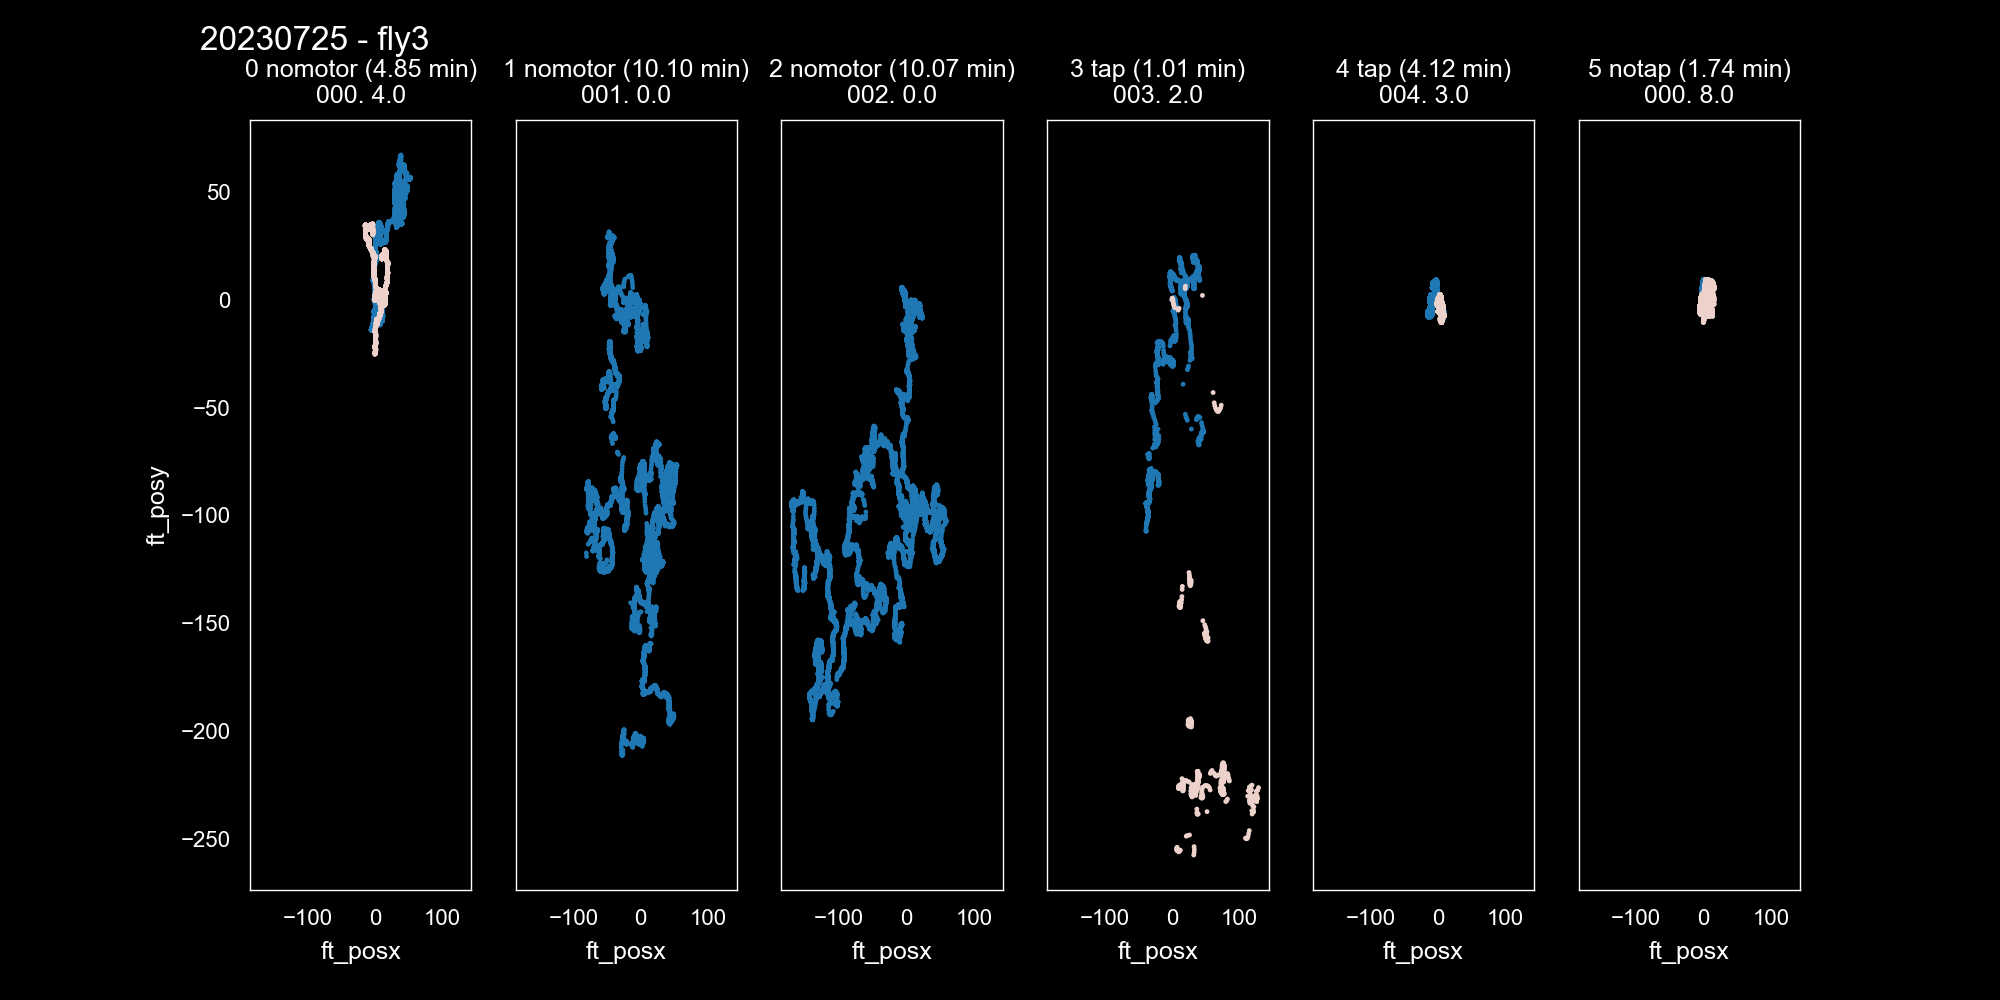

20230725-174143_P1_activation_fly3-notap_000


Text(0.1, 0.95, '20230725 - fly3')

In [482]:
#curr_trials = df0[['filename', 'blocknum']].drop_duplicates().dropna().shape[0]
n_trials = len(filenames)
max_nblocks = int(df0['blocknum'].max()+1)
fig, axn = pl.subplots(1, n_trials, figsize=(10, 5), sharex=True, sharey=True)
    
for fi, (fn, df_) in enumerate(df0.sort_values(by='filename').groupby('filename')):
    colors = sns.color_palette('cubehelix', n_colors=df_['blocknum'].nunique())
    for ci, (bk, df2) in enumerate(df_.groupby('blocknum')):
        ax=axn[fi]
        dur_min = df_['rel_time'].max() / 60.
        sns.scatterplot(data=df2, x=xvar, y=yvar, ax=ax,
                       edgecolor='none', s=3 , legend=0, hue='blocknum', color=colors[ci])
        curr_cond = df_['condition'].unique()[0]
    ax.set_title('{} {} ({:.2f} min)\n{}. {}'.format(fi, curr_cond, dur_min, \
                                                  fn.split('_')[-1], bk))
    #ax.set_aspect('equal')
#util.label_figure(fig, '{}'.format(os.path.split(fn)[-1]))
figname = '{}'.format(fn)
print(fn)
    
fig.text(0.1, 0.95, '{} - {}'.format(date, flyid), fontsize=12)

## double-check correct position updating

<IPython.core.display.Javascript object>


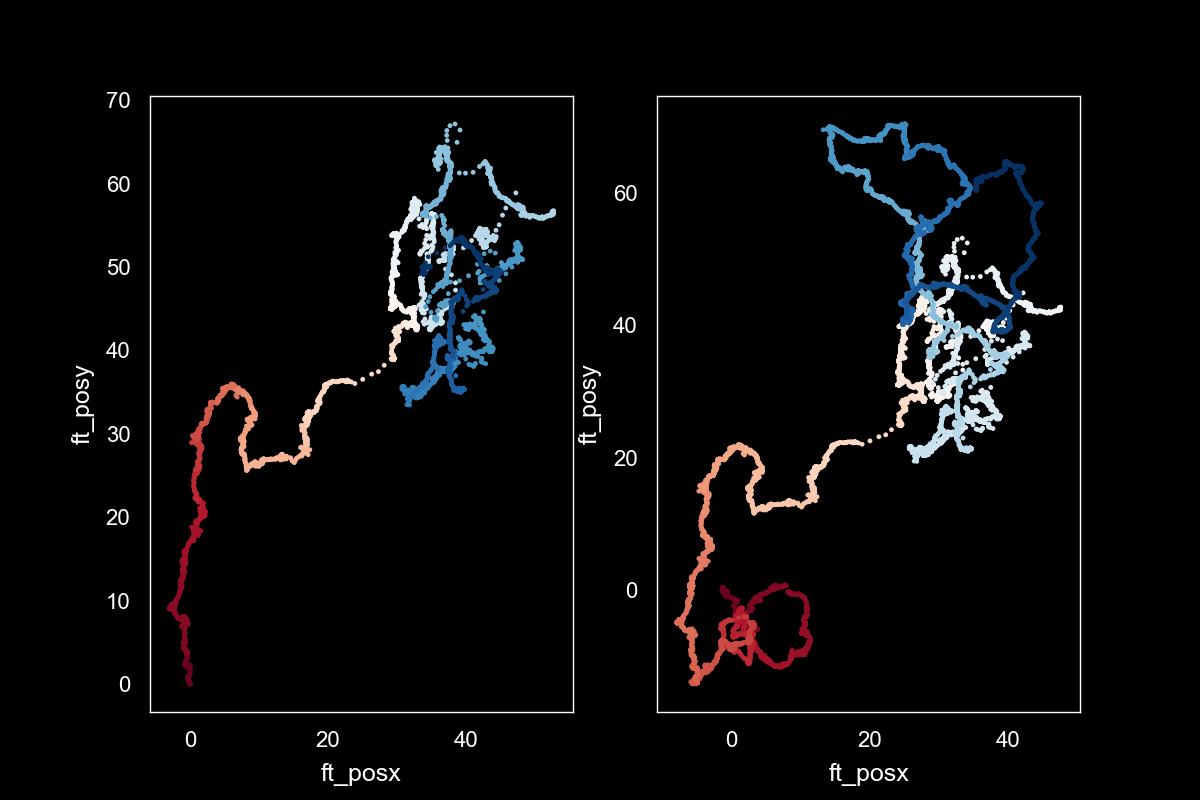

<AxesSubplot: xlabel='ft_posx', ylabel='ft_posy'>

In [448]:
fn = df0['filename'].unique()[0]
df0_ = df0[df0['filename']==fn].copy()
df1_ = merged[merged['filename']==fn].copy()
fig, axn = pl.subplots(1,2)
ax=axn[0]
sns.scatterplot(data=df0_[df0_['blocknum']==1], x=xvar, y=yvar, ax=ax, 
                hue='rel_time',palette='RdBu',
                edgecolor='none', s=3 , legend=0) 
ax=axn[1]
sns.scatterplot(data=df1_, x=xvar, y=yvar, ax=ax, hue='rel_time',palette='RdBu',
                       edgecolor='none', s=3 , legend=0)

<IPython.core.display.Javascript object>


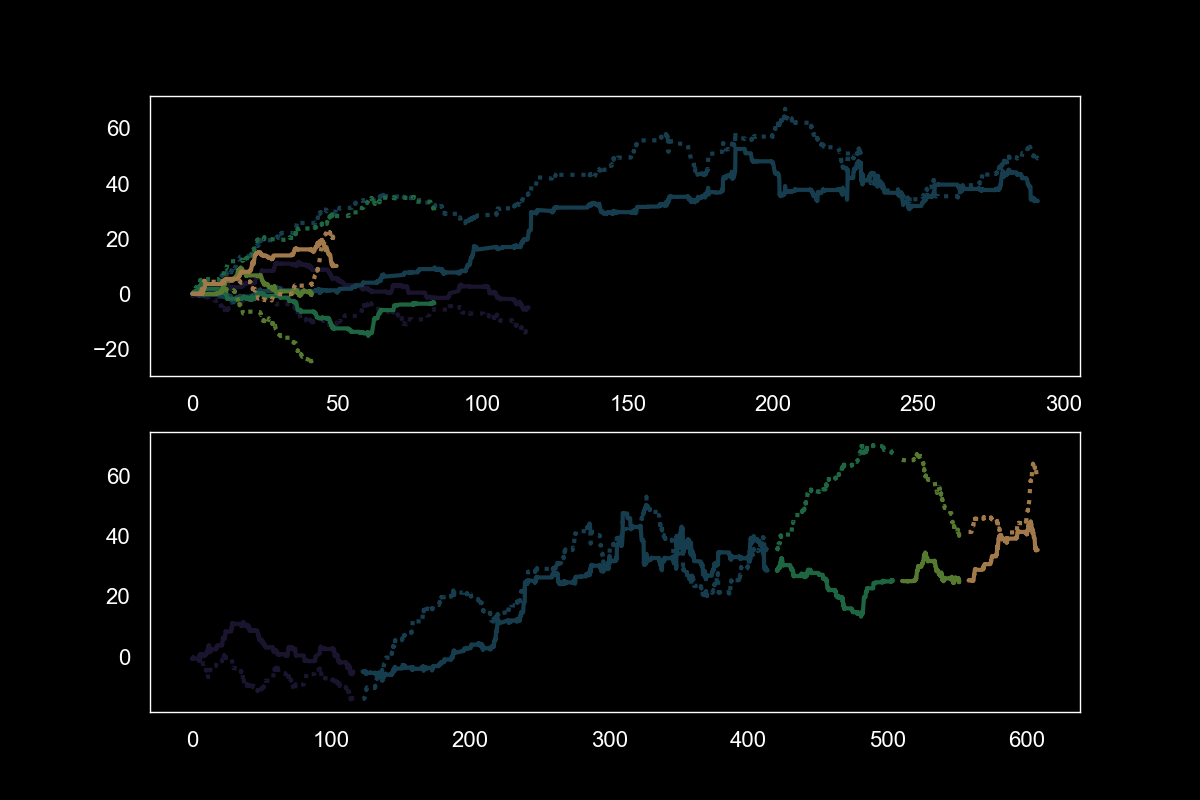

In [450]:
fig, axn = pl.subplots(2, 1)
ax=axn[0]
for c, (bnum, b_) in zip(colors, df0_.groupby('blocknum')):
    ax.plot(b_['rel_time'], b_['ft_posx'], color=c)
    ax.plot(b_['rel_time'], b_['ft_posy'], color=c, linestyle=':')
ax=axn[1]
for c, (bnum, b_) in zip(colors, df1_.groupby('blocknum')):
    ax.plot(b_['rel_time'], b_['ft_posx'], color=c)
    ax.plot(b_['rel_time'], b_['ft_posy'], color=c, linestyle=':')

In [485]:
merged['filename'].unique()

array(['20230725-161941_P1_activation_fly3-nomotor_000',
       '20230725-164507_P1_activation_fly3-nomotor_001',
       '20230725-170529_P1_activation_fly3-nomotor_002',
       '20230725-172103_P1_activation_fly3_003',
       '20230725-172509_P1_activation_fly3_004',
       '20230725-174143_P1_activation_fly3-notap_000'], dtype=object)

<IPython.core.display.Javascript object>


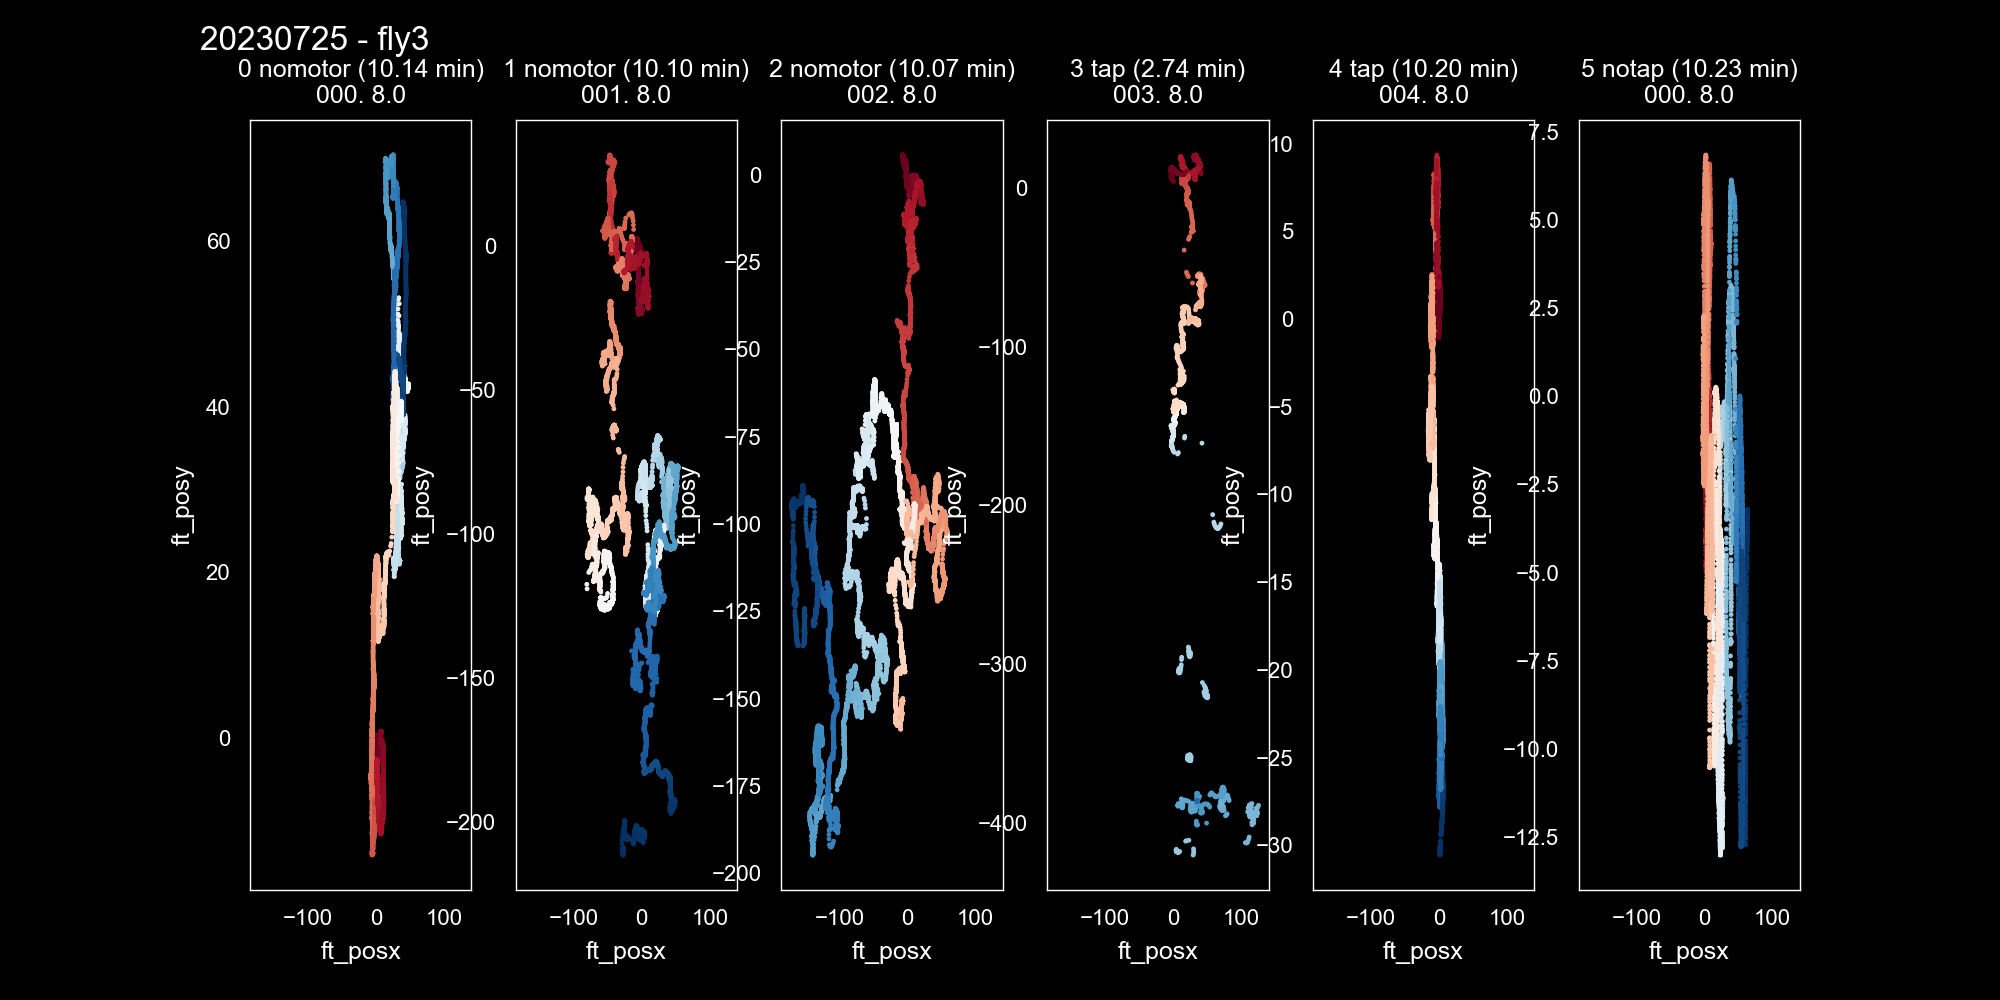

20230725-174143_P1_activation_fly3-notap_000


Text(0.1, 0.95, '20230725 - fly3')

In [486]:
#curr_trials = df0[['filename', 'blocknum']].drop_duplicates().dropna().shape[0]
n_trials = merged['filename'].dropna().nunique()
max_nblocks = int(df0['blocknum'].max()+1)
fig, axn = pl.subplots(1, n_trials, figsize=(10, 5), sharex=True, sharey=False)
    
for fi, (fn, df_) in enumerate(merged.sort_values(by='filename').groupby('filename')):
    colors = sns.color_palette('cubehelix', n_colors=df_['blocknum'].nunique())
    ax=axn[fi]
    dur_min = df_['rel_time'].max() / 60.
    sns.scatterplot(data=df_, x=xvar, y=yvar, ax=ax, palette='RdBu',
                   edgecolor='none', s=3 , legend=0, hue='rel_time') #color=colors[ci])
                    #hue_norm=mpl.colors.Normalize(vmin=0, vmax=1800))
    curr_cond = df_['condition'].unique()[0]
    ax.set_title('{} {} ({:.2f} min)\n{}. {}'.format(fi, curr_cond, dur_min, \
                                                  fn.split('_')[-1], bk))
    #ax.set_aspect('equal')
#util.label_figure(fig, '{}'.format(os.path.split(fn)[-1]))
figname = '{}'.format(fn)
print(fn)
    
fig.text(0.1, 0.95, '{} - {}'.format(date, flyid), fontsize=12)

In [460]:
merged['filename'].unique()

array(['20230725-161941_P1_activation_fly3-nomotor_000',
       '20230725-164507_P1_activation_fly3-nomotor_001',
       '20230725-170529_P1_activation_fly3-nomotor_002',
       '20230725-172103_P1_activation_fly3_003',
       '20230725-172509_P1_activation_fly3_004',
       '20230725-174143_P1_activation_fly3-notap_000'], dtype=object)

In [463]:
df0['filename'].dropna().unique()

array(['20230725-161941_P1_activation_fly3-nomotor_000',
       '20230725-164507_P1_activation_fly3-nomotor_001',
       '20230725-170529_P1_activation_fly3-nomotor_002',
       '20230725-172103_P1_activation_fly3_003',
       '20230725-172509_P1_activation_fly3_004',
       '20230725-174143_P1_activation_fly3-notap_000'], dtype=object)

## Look at 1 trial

20230725-174143_P1_activation_fly3-notap_000


<IPython.core.display.Javascript object>


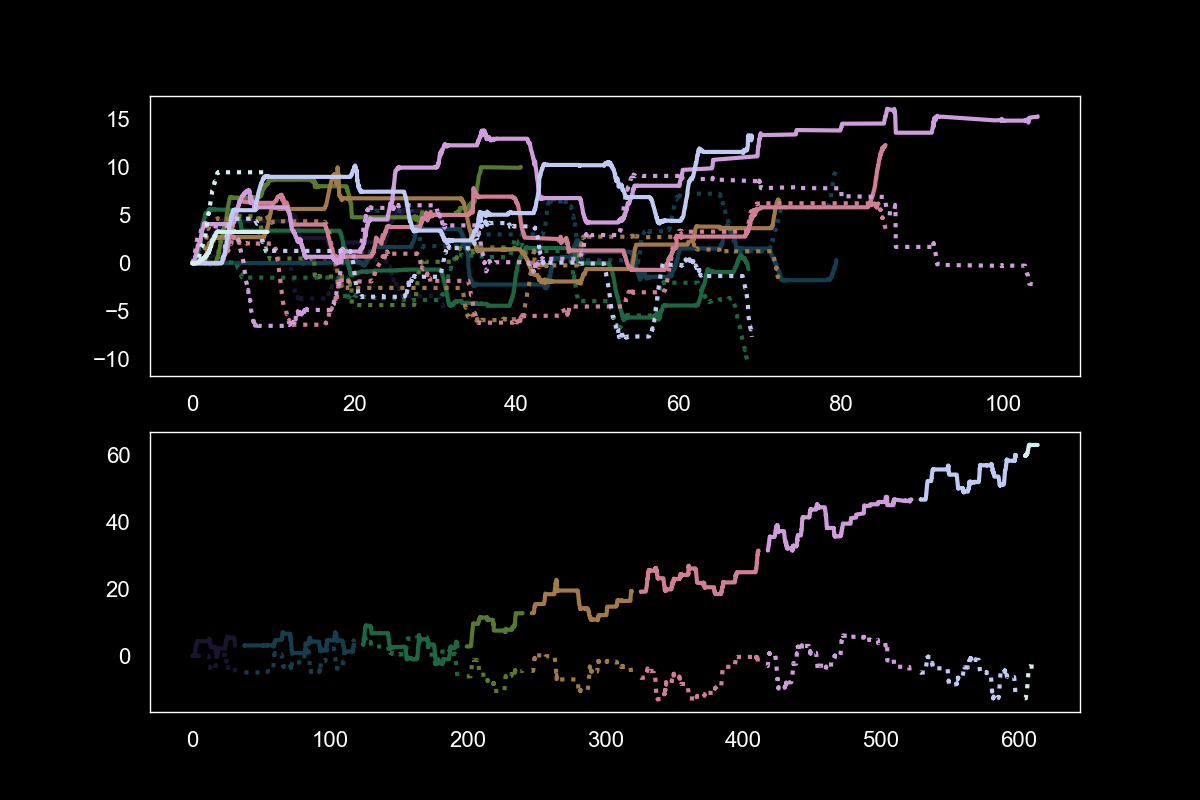

In [491]:
fn = filenames[5]
print(fn)
df0_ = df0[df0['filename']==fn].copy()
df1_ = merged[merged['filename']==fn].copy()
fig, axn = pl.subplots(2, 1)
ax=axn[0]
for c, (bnum, b_) in zip(colors, df0_.groupby('blocknum')):
    ax.plot(b_['rel_time'], b_['ft_posx'], color=c)
    ax.plot(b_['rel_time'], b_['ft_posy'], color=c, linestyle=':')
ax=axn[1]
for c, (bnum, b_) in zip(colors, df1_.groupby('blocknum')):
    ax.plot(b_['rel_time'], b_['ft_posx'], color=c)
    ax.plot(b_['rel_time'], b_['ft_posy'], color=c, linestyle=':')

<IPython.core.display.Javascript object>


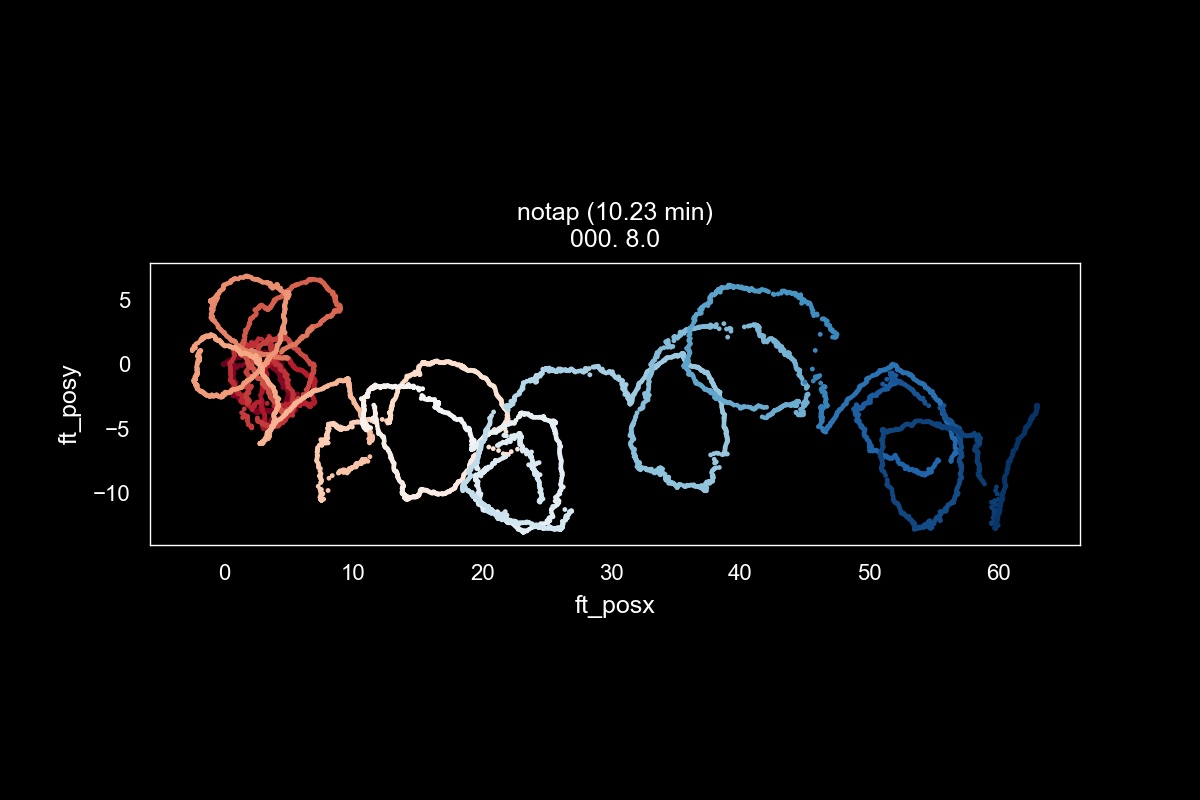

In [492]:
fig, ax = pl.subplots()
dur_min = df1_['rel_time'].max() / 60.
sns.scatterplot(data=df1_, x=xvar, y=yvar, ax=ax, palette='RdBu',
               edgecolor='none', s=3 , legend=0, hue='rel_time') #color=colors[ci])
                #hue_norm=mpl.colors.Normalize(vmin=0, vmax=1800))
curr_cond = df1_['condition'].unique()[0]
ax.set_title('{} ({:.2f} min)\n{}. {}'.format(curr_cond, dur_min, \
                                              fn.split('_')[-1], bk))
ax.set_aspect('equal')

In [490]:
df1_['blocknum'].unique()

array([0., 1., 2., 3.])